# Avocado Data Analysis


## Business Understanding

The aim of this project is to answer the following four questions:
    1. Which region are the lowest and highest prices of Avocado?
    2. What is the highest region of avocado production?
    3. What is the average avocado prices in each year?
    4. What is the average avocado volume in each year?

## Data Understanding

The [Avocado dataset](https://www.kaggle.com/neuromusic/avocado-prices) was been used in this project.

This dataset contains 13 columns:
    1. Date - The date of the observation
    2. AveragePrice: the average price of a single avocado
    3. Total Volume: Total number of avocados sold
    4. Total Bags: Total number  o bags
    5. Small Bags: Total number of Small bags
    6. Large Bags: Total number of Large bags
    7. XLarge Bags: Total number of XLarge bags
    8. type: conventional or organic
    9. year: the year
    10. region: the city or region of the observation
    11. 4046: Total number of avocados with PLU 4046 sold
    12. 4225: Total number of avocados with PLU 4225 sold
    13. 4770: Total number of avocados with PLU 4770 sold


### Import necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Data preparation


### Load data

In [2]:
df = pd.read_csv('avocado.csv')

### Explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Missing value checking

In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Dropping unnecessary columns

In [6]:
df = df.drop(['Unnamed: 0','4046','4225','4770','Date'],axis=1)

In [7]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Answering questions 

In [8]:
def get_avarage(df,column):
    """
    Description: This function to return the average value of the column 

    Arguments:
        df: the DataFrame. 
        column: the selected column. 
    Returns:
        column's average 
    """
    return sum(df[column])/len(df)

In [9]:
def get_avarge_between_two_columns(df,column1,column2):
    """
    Description: This function calculate the average between two columns in the dataset

    Arguments:
        df: the DataFrame. 
        column1:the first column. 
        column2:the scond column.
    Returns:
        Sorted data for relation between column1 and column2
    """
    
    List=list(df[column1].unique())
    average=[]

    for i in List:
        x=df[df[column1]==i]
        column1_average= get_avarage(x,column2)
        average.append(column1_average)

    df_column1_column2=pd.DataFrame({'column1':List,'column2':average})
    column1_column2_sorted_index=df_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data=df_column1_column2.reindex(column1_column2_sorted_index)
    
    return column1_column2_sorted_data

In [10]:
def plot(data,xlabel,ylabel):
    """
    Description: This function to draw a barplot

    Arguments:
        data: the DataFrame. 
        xlabel: the label of the first column. 
        ylabel: the label of the second column.
    Returns:
        None
    """
        
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(('Avarage '+ylabel+' of Avocado According to '+xlabel));

### Which region are the lowest and highest prices of Avocado?

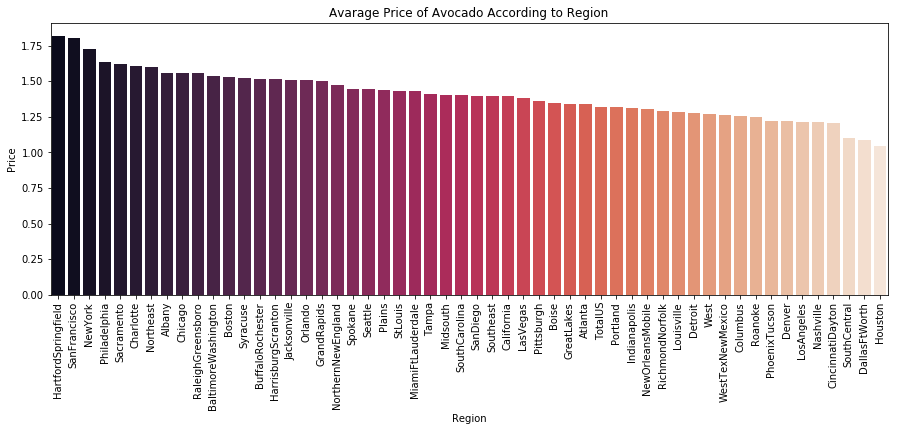

In [11]:
data1 = get_avarge_between_two_columns(df,'region','AveragePrice')
plot(data1,'Region','Price')

In [12]:
print(data1['column1'].iloc[-1], " is the region producing avocado with the lowest price.")

Houston  is the region producing avocado with the lowest price.


### What is the highest region of avocado production?

#### Checking if there are outlier values or not.

Text(0.5, 1.0, 'Figure: Boxplot repersenting outlier columns.')

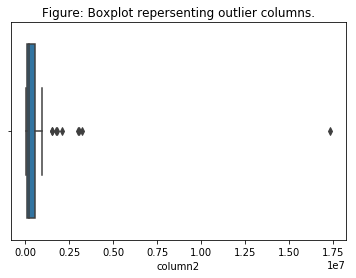

In [13]:
data2 = get_avarge_between_two_columns(df,'region','Total Volume')
sns.boxplot(x=data2.column2).set_title("Figure: Boxplot repersenting outlier columns.")

In [14]:
outlier_region = data2[data2.column2>10000000]
print(outlier_region['column1'].iloc[-1], "is outlier value")

TotalUS is outlier value


#### Remove the outlier values

In [15]:
outlier_region.index
data2 = data2.drop(outlier_region.index,axis=0)

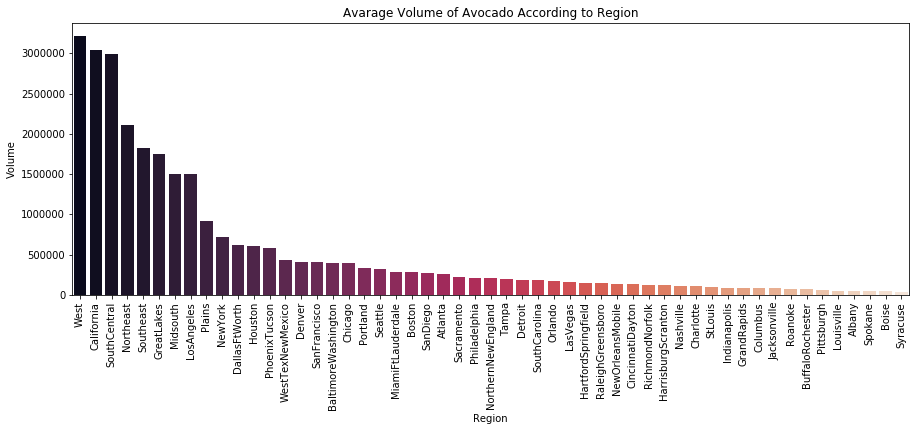

In [16]:
plot(data2,'Region','Volume')

### What is the average avocado prices in each year?

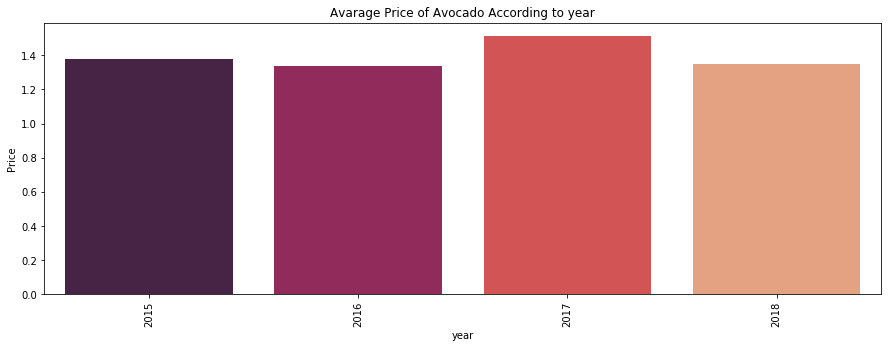

In [17]:
data3 = get_avarge_between_two_columns(df,'year','AveragePrice')
plot(data3,'year','Price')

### What is the average avocado volume in each year?

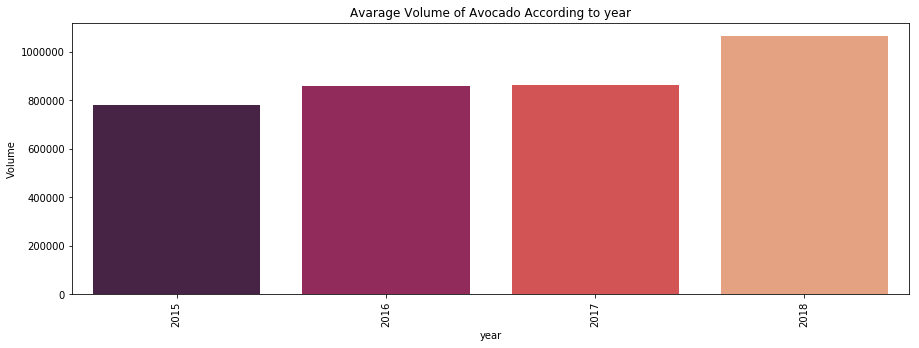

In [18]:
data4 = get_avarge_between_two_columns(df,'year','Total Volume')
plot(data4,'year','Volume')

## Data Modeling

We bulit the regrestion model by used [Linear regresion from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to predict the avocado price.

### Changing some column types to categories

In [19]:
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

df['type'] = df['type'].astype('category')
df['type'] = df['type'].cat.codes

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 9 columns):
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null int8
year            18249 non-null int64
region          18249 non-null int8
dtypes: float64(6), int64(1), int8(2)
memory usage: 1.0 MB


In [21]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,2015,0


In [22]:
# split data into X and y
X = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

# split data into traing and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=15)

In [23]:
print("training set:",X_train.shape,' - ',y_train.shape[0],' samples')
print("testing set:",X_test.shape,' - ',y_test.shape[0],' samples')

training set: (12774, 8)  -  12774  samples
testing set: (5475, 8)  -  5475  samples


In [24]:
# bulid and fit the model
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

## Evaluate the Results

In [25]:
# prediction and calculate the accuracy for the testing dataset
test_pre = model.predict(X_test)
test_score = r2_score(y_test,test_pre)
print("The accuracy of testing dataset ",test_score*100)

The accuracy of testing dataset  38.58074176429158


In [26]:
# prediction and calculate the accuracy for the testing dataset
train_pre = model.predict(X_train)
train_score = r2_score(y_train,train_pre)
print("The accuracy of training dataset ",train_score*100)

The accuracy of training dataset  39.70686042411577


The model doesn't work well with this dataset, In order to the avocado prices were near together

## Deploy